<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%20%EB%B0%A9%EB%B2%95%EB%A1%A0/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%EC%BF%A8_0623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기초
[데이터의 유형(실습)](https://happydata1510.notion.site/3-7f061312143a4113be4caddd5cab8c0e)

In [1]:
import random
import pandas as pd

# 학생 데이터 생성
def generate_student_data(num_students):
    student_data = []
    for i in range(1, num_students+1):
        student_number = f'{i:03}'  # 학생번호 생성 (예: 001, 002, ...)
        grade = random.randint(1, 3)  # 학년 랜덤 생성 (1~3 중 선택)
        english_score = random.randint(60, 100)  # 영어 점수 랜덤 생성 (60~100 사이)
        korean_score = random.randint(60, 100)  # 국어 점수 랜덤 생성 (60~100 사이)
        math_score = random.randint(60, 100)  # 수학 점수 랜덤 생성 (60~100 사이)
        total_score = english_score + korean_score + math_score  # 전체 성적 계산

        student_data.append([
            student_number,
            grade,
            english_score,
            korean_score,
            math_score,
            total_score
        ])

    # 전체 성적에 따라 순위 매기기
    student_data = sorted(student_data, key=lambda x: x[5], reverse=True)
    for i, student in enumerate(student_data):
        student.append(i + 1)

    return student_data

# 10명의 학생 데이터 생성
students = generate_student_data(10)

# 데이터프레임 생성
df = pd.DataFrame(students, columns=['학생번호', '학년', '영어', '국어', '수학', '전체성적', '전체성적순위'])

# 생성된 데이터프레임 출력
df

,학생번호,학년,영어,국어,수학,전체성적,전체성적순위
0,008,2,86,97,90,273,1
1,010,1,98,84,83,265,2
2,009,3,88,99,68,255,3
3,001,2,98,84,67,249,4
4,005,1,61,95,91,247,5
5,004,3,84,91,63,238,6
6,002,1,71,76,82,229,7
7,003,3,86,70,69,225,8
8,007,1,65,95,60,220,9
9,006,3,79,61,69,209,10


In [2]:
# 영어 성적에 대해 출력
df['영어']

0    86
1    98
2    88
3    98
4    61
5    84
6    71
7    86
8    65
9    79
Name: 영어, dtype: int64

DataFrame은 2차원, Series는 1차원의 데이터 구조
가끔 데이터 구조로 인해 분석 시 오류가 나는 경우가 있는데 이러한 데이터 구조를 잘 파악해야 합니다.

데이터의 크기를 살펴보지 않고 무턱대고 실행시키거나 분석을 들어가면 다음과 같은 오류에 빠질 수 있음
- 데이터의 크기가 커서 컴퓨터나 시스템 다운
- 분석을 처음했을 때와 마지막 했을 때의 데이터 수가 다름
- 내가 필요한 변수나 자료가 없는 상태로 분석 진행

In [3]:
# 데이터의 크기 shape
df.shape
# (데이터에 대한 수, 변수에 대한 수)

(10, 7)

## 데이터 중심 지표
데이터의 특징을 파악하는데는 두가지 방법이 있습니다.
- 하나는 평균과 분산등의 수치 지표에 따라 데이터를 요약하는 방법
- 하나는 그림을 그려 시각화 하는 방법

In [4]:
import numpy as np
import pandas as pd

In [5]:
# array를 사용하면 조금 더 빠른 수학 연산들을 할 수 있음
scores = np.array(df['영어'])[:10]
scores

array([86, 98, 88, 98, 61, 84, 71, 86, 65, 79])

In [6]:
# 이를 데이터 프레임으로 따로 구성하고 싶다면 다음과 같이 변경할 수 있음
scores_df = pd.DataFrame({'score': scores},
                         index=pd.Index(df.index, name='stundent_num'))
scores_df

,score
stundent_num,
0,86
1,98
2,88
3,98
4,61
5,84
6,71
7,86
8,65


### 평균값 mean
데이터를 하나의 값으로 요약한 지표이며, 대표값으로 불립니다. 평균값의 경우 데이터의 전반적인 중간값을 알 수 있는 척도이지만 분산 이나 그래프가 없이 평균만 보고 판단할 경우 상당한 데이터적 오류에 빠질 수 있으니 주의해야합니다.

In [7]:
sum(scores)/len(scores)

81.6

In [8]:
np.mean(scores) # numpy

81.6

In [9]:
scores_df.mean() # pandas

score    81.6
dtype: float64

###중앙값 median
- 중앙값은 크기 순서대로 나열할때 정확하게 중앙에 위치한 값입니다. 예를 들어 1,2,3,4,5라는 데이터가 있으면 3이 중앙값이 됩니다.
- 중앙값은 이상치에 영향을 덜받는 특징이 있습니다. [1,2,3,4,5,1000] 이라는 데이터가 있는 경우 평균과 중앙값의 차이는 어마어마하게 나게 됩니다.
- 중앙값은 꼭 데이터안에 있는 수를 표현하지 않아도 됩니다. 예를 들어 [1,2,3,4,5,6]이라는 데이터가 있는 경우 중앙값은 3.5입니다.

In [10]:
scores

array([86, 98, 88, 98, 61, 84, 71, 86, 65, 79])

In [11]:
# 중앙값 계산
# 데이터의 개수가 홀수면 (n+1)/2 번째 데이터가 중앙값
# 데이터의 개수가 짝수면 n/2번째 데이터와 n/2+1번째 데이터의 평균이 중앙값
sorted_scores = np.sort(scores)
sorted_scores

array([61, 65, 71, 79, 84, 86, 86, 88, 98, 98])

In [12]:
# 중앙값의 정의대로 코드를 작성하면 다음과 같이 됩니다.
# 주의점 : 파이썬은 0부터 시작하기 때문에 - 1을 해야합니다.
n = len(sorted_scores)
if n % 2 == 0:
  m0 = sorted_scores[n//2 - 1]
  m1 = sorted_scores[n//2]
  median = (m0 + m1) / 2
else:
  median = sorted_scores[(n+1)//2 - 1]

print(median)

85.0


In [13]:
np.median(scores)

85.0

In [14]:
scores_df.median()

score    85.0
dtype: float64

### 최빈값 mode
최빈값은 데이터에서 가장 많이 나타나는 값입니다. 최빈값을 사용하면 데이터가 중간값이 많은지, 극단값이 많은지, Null값이나 특이값이 많은지를 파악할 수 있습니다.

In [15]:
# 최빈값 산출
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [16]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [17]:
from scipy. stats import mode
a=[1,2,2,3,4,5]
mode(a)

<ipython-input-17-aaedaa2ce510>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode(a)


ModeResult(mode=array([2]), count=array([2]))

## 데이터의 산포도 지표

### 편차 deviation
산포도를 구하는 대표적인 방법은 편차(deviation)을 알아보는 것입니다. 편차는 각 데이터가 평균으로 부터 어느 정도 떨어져 있는지를 파악하는 척도입니다. 예를 들어 A학생의 점수가 50점이고 학생의 평균점수가 60점이라면 A학생의 편차는 -10점이 됩니다.

In [18]:
# 학생들의 성적 평균구하기
mean = np.mean(scores)
print(mean)

# 편차 구하기
deviation = scores - mean
deviation

81.6


array([  4.4,  16.4,   6.4,  16.4, -20.6,   2.4, -10.6,   4.4, -16.6,
        -2.6])

In [19]:
# 편차를 데이터 프레임에 추가하기
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
stundent_num,,
0,86,4.4
1,98,16.4
2,88,6.4
3,98,16.4
4,61,-20.6
5,84,2.4
6,71,-10.6
7,86,4.4
8,65,-16.6


In [20]:
summary_df.mean()

score        8.160000e+01
deviation    5.684342e-15
dtype: float64

In [21]:
# 소수점을 제한하는 함수
%precision 3
pd.set_option('float_format', '{:.2f}'.format)

In [22]:
summary_df.mean() # 편차의 합은 0

score       81.60
deviation    0.00
dtype: float64

### 분산 var
다음과 같이 각 데이터와 평균 간 차이를 나타내는 편차를 이용하는 것은 바람직한 방법이긴 하지만 편차의 평균이 0이 되면 추가적인 분석을 하기에는 애매합니다.

그래서 편차에 제곱을 하게 된다면 그 척도를 사용할 수 있게 됩니다.

In [23]:
np.mean(deviation ** 2)

144.24000000000004

In [24]:
np.var(scores)

144.24000000000004

In [25]:
# pandas에도 분산을 구하는 방법은 있지만 pandas의 분산은 불편 추정량에 의한 분산입니다.
scores_df.var()

score   160.27
dtype: float64

In [26]:
# summary_df에 편차 제곱을 추가
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
stundent_num,,,
0,86,4.40,19.36
1,98,16.40,268.96
2,88,6.40,40.96
3,98,16.40,268.96
4,61,-20.60,424.36
5,84,2.40,5.76
6,71,-10.60,112.36
7,86,4.40,19.36
8,65,-16.60,275.56


In [27]:
# 분산 산출
summary_df.mean()

score                  81.60
deviation               0.00
square of deviation   144.24
dtype: float64

###표준편차 std
평균의 단위는 원래 데이터의 단위를 따라가게 됩니다. 위의 자료에서는 80.8점이 평균이다라고 말할수 있지만 분산은 그럴수가 없습니다. 제곱을 했기 때문입니다. 영어점수의 분산이 93.16의 제곱이다 라고 말하는것도 웃기는 상황입니다.

그래서 원래의 단위와 통일하기 위해 표준편차라는 개념을 도입하였고, 그것은 분산에 루트를 씌워 제곱을 상쇄시킨 개념입니다.

In [28]:
np.sqrt(np.var(scores, ddof =0))

12.009995836801945

In [29]:
np.std(scores, ddof = 0 )

12.009995836801945

###범위 IQR
범위는 분산이나 표준편차와 달리, 데이터 전체를 보는 것이 아니라 데이터의 최댓값과 최솟값만으로 산포도를 표현하는 방법입니다. 최댓값과 최솟값의 차이가 크면 산포도가 크고, 그 차이가 작으면 산포도가 작다는 의미로도 해석할 수 있습니다.

두가지의 값으로만 계산된 값이므로, 대략적인 자료에 파악에 유용하지만 평균과 동일하게 주의해야합니다.

In [30]:
# 범위 = max 값에서 min값
np.max(scores) - np.min(scores)

37

범위에는 4분위 범위라는것도 있습니다. 큰 이상값이 하나라도 있으면 범위나 평균같은 수치들은 엄청난 변화가 있을 수 있습니다. 그래서 사분위 범위를 참고하면 데이터를 보는데 도움이 됩니다.

최근에는 4분위 값 뿐만아니라 99% 95% 90% , 1% 5% 10%에 해당하는 값들을 같이 봐서 데이터의 전체적인 파악을 하고, 하나의 값이 얼마나 있는지 고루 분포되어있는지를 파악하게 됩니다.

이러한 특이점이 있는 데이터들은 그래프로도 식별하기 쉽지 않을수 있기 때문에 4분위수를 구하는것은 여러모로 도움이 됩니다.

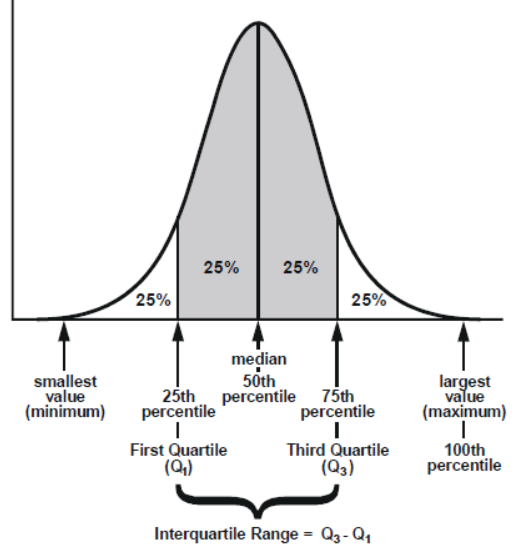

In [31]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

14.5

IQR을 사용할때 Q2를 사용하지는 않지만 IQR = Q2라고 생각하시면 됩니다. 분산은 평균에 대해 정의되는 산포도라고 한다면 IQR은 중앙값에 대해 정의되는 산포도 지표라고 해석할 수 있습니다.

Q1, Q2, Q3은 상자그림으로도 그려볼수 있습니다.

### 한번에 데이터 보기
describe 라는 함수를 사용하면 모든 데이터의 개요를 볼 수 있습니다. 다음과 같이 데이터를 간단히 바라보고 세부적으로 분석하는것도 방법이라고 생각합니다.

In [32]:
pd.Series(scores).describe()

count   10.00
mean    81.60
std     12.66
min     61.00
25%     73.00
50%     85.00
75%     87.50
max     98.00
dtype: float64

##데이터의 정규화
평균과 분산에 의존하지 않고 데이터를 파악한다면 데이터의 더 상대적인 위치를 알 수 있을 것입니다.

수능같은 예시를 들때 불수능이다. 이러면 1등급 컷이 70~80점대 일때도 있고, 물수능이다. 이러면 99점도 2등급일 수 있는데, 절대적인 수치로만 봤을때는 이해가 안되지만 상대적인 수치에 대한 비교를 했을때 다음과 같은 사례가 이해가 될것입니다.

###표준화 standardization
통계학에서는 데이터에서 평균을 빼고 표준편차로 나누는 작업을 표준화(standardization)라고 합니다.

In [33]:
stand_data = (scores - np.mean(scores)) / np.std(scores)
stand_data

array([ 0.366,  1.366,  0.533,  1.366, -1.715,  0.2  , -0.883,  0.366,
       -1.382, -0.216])

표준화된 데이터는 평균이 0 표준편차가 1로 됩니다.

In [34]:
rounded_mean = np.around(np.mean(stand_data), decimals=2)
rounded_mean

0.0

In [35]:
np.std(stand_data, ddof= 0)

0.9999999999999998

데이터와 동일한 표준편차로 나눗셈을 했기 때문에 표준화된 데이터는 원래 데이터의 단위를 사용할 수 없다

# 실습
[데이터의 유형(실습) - 배포용](https://happydata1510.notion.site/3-11433765d99b4ceeae62e78d67bfc040)

서울시 마포구 따릉이 데이터 Train Data를 가지고 배운내용을 토대로 통계적 EDA 해보기

- 기초 EDA 후 추가적으로 어떤 분석을 하면 좋을지 생각해보기
- 정리하기 - 1차원 데이터 분석으로 얻은 인사이트 정리하기
- 생각해보기 - 시간의 따른 따릉이 대여수를 예측한것을 어떻게 활용할 수 있을까?
- 생각해보기 - 더 있었으면 좋은 공공 데이터는 어떤것이 있을까?

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
train_df = pd.read_csv('train.csv')
train_df

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.30,1.00,1.50,89.00,576.00,0.03,76.00,33.00,49.00
1,6,13,20.10,0.00,1.40,48.00,916.00,0.04,73.00,40.00,159.00
2,7,6,13.90,0.00,0.70,79.00,1382.00,0.03,32.00,19.00,26.00
3,8,23,8.10,0.00,2.70,54.00,946.00,0.04,75.00,64.00,57.00
4,9,18,29.50,0.00,4.80,7.00,2000.00,0.06,27.00,11.00,431.00
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.80,0.00,1.60,53.00,2000.00,0.03,37.00,27.00,21.00
1455,2175,3,10.80,0.00,3.80,45.00,2000.00,0.04,34.00,19.00,20.00
1456,2176,5,18.30,0.00,1.90,54.00,2000.00,0.01,30.00,21.00,22.00
1457,2178,21,20.70,0.00,3.70,37.00,1395.00,0.08,71.00,36.00,216.00


- id : 날짜와 시간별 id
- hour_bef_temperature : 1시간 전 기온
- hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
- hour_bef_windspeed : 1시간 전 풍속(평균)
- hour_bef_humidity : 1시간 전 습도
- hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- hour_bef_ozone : 1시간 전 오존
- hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count : 시간에 따른 따릉이 대여 수

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [39]:
train_df.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.00,1459.00,1457.00,1457.00,1450.00,1457.00,1457.00,1383.00,1369.00,1342.00,1459.00
mean,1105.91,11.49,16.72,0.03,2.48,52.23,1405.22,0.04,57.17,30.33,108.56
std,631.34,6.92,5.24,0.17,1.38,20.37,583.13,0.02,31.77,14.71,82.63
min,3.00,0.00,3.10,0.00,0.00,7.00,78.00,0.00,9.00,8.00,1.00
25%,555.50,5.50,12.80,0.00,1.40,36.00,879.00,0.03,36.00,20.00,37.00
50%,1115.00,11.00,16.60,0.00,2.30,51.00,1577.00,0.04,51.00,26.00,96.00
75%,1651.00,17.50,20.10,0.00,3.40,69.00,1994.00,0.05,69.00,37.00,150.00
max,2179.00,23.00,30.00,1.00,8.00,99.00,2000.00,0.12,269.00,90.00,431.00


- count: 해당 column에서 비어 있지 않은 값의 개수
- mean: 평균
- std: 표준편차
- min: 최솟값 (이상치 포함)
- 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
- 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
- 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
- max: 최댓값 (이상치 포함)

In [40]:
train_df.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

## 결측값 처리

In [41]:
# 모든 컬럼이 결측값인 행 제거
df_drop_all = train_df.dropna(how='all')
df_drop_all.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [42]:
# 특정 컬럼(hour_bef_temperature)이 결측값인 행 제거
df_drop_slt = train_df.dropna(subset=['hour_bef_temperature'])
df_drop_slt.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          7
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             74
hour_bef_pm10              88
hour_bef_pm2.5            115
count                       0
dtype: int64

In [43]:
# 한 컬럼이라도 결측치가 있는 행 제거
df_drop_any = train_df.dropna(how='any')
df_drop_any.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

## 상관관계

In [44]:
import seaborn as sns

<Axes: >

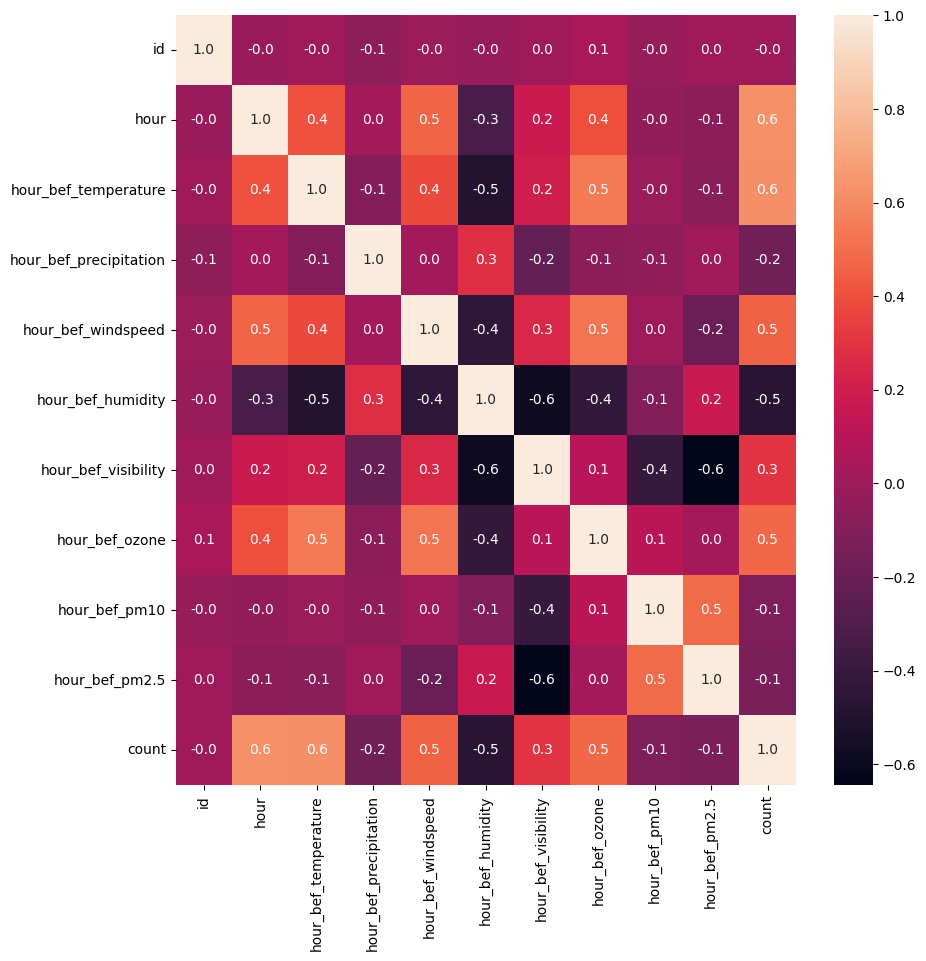

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(), fmt='.1f', annot=True)
# -1, 1 양 끝 값에 가까울수록 상관관계 높음
# 0.3 < a : 상관관계가 있다
# 0.7 < a : 상관관계가 높다

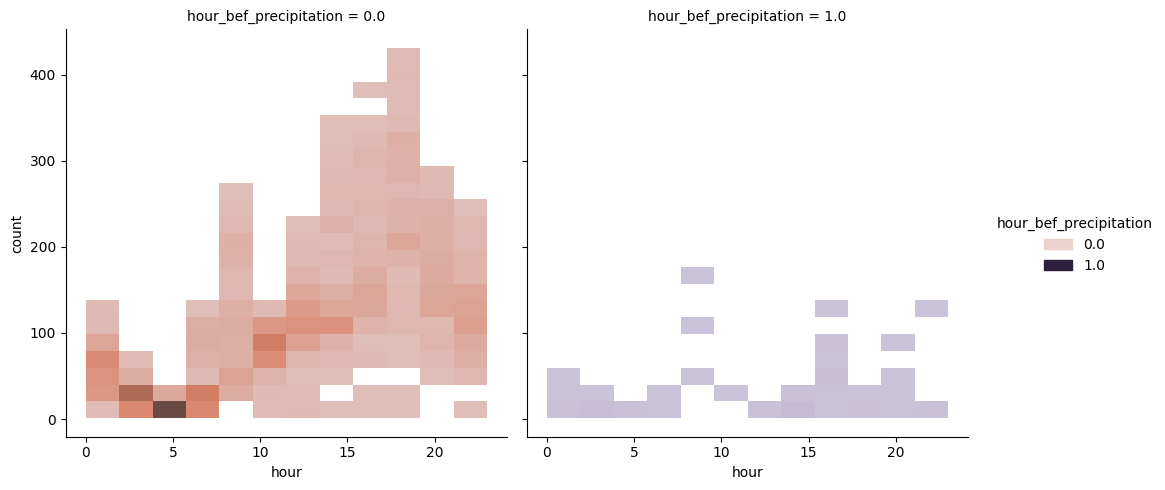

In [46]:
sns.displot(data=train_df, x='hour', y='count',
            hue='hour_bef_precipitation', col='hour_bef_precipitation')

<Axes: xlabel='hour', ylabel='hour_bef_humidity'>

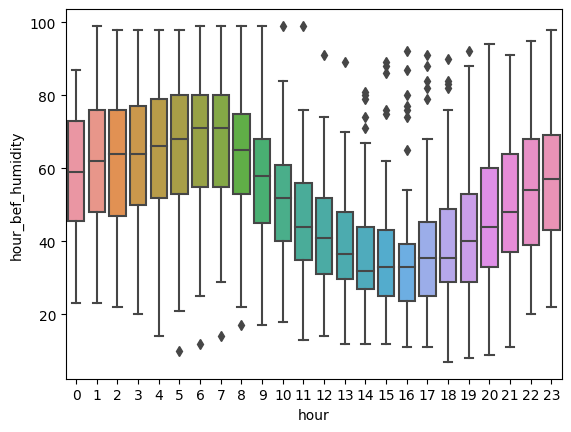

In [47]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train_df)

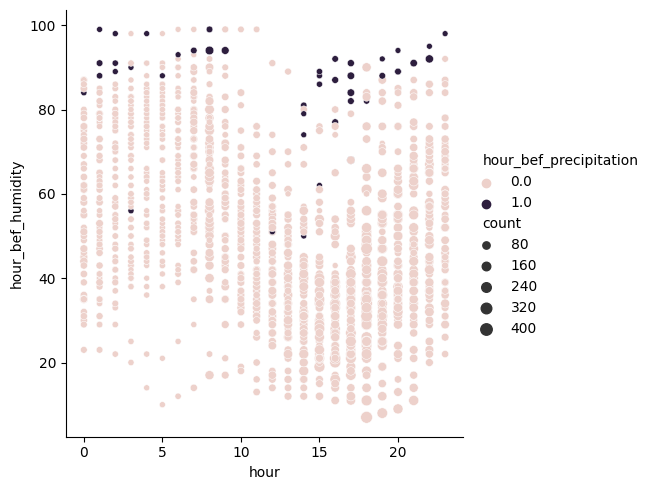

In [48]:
# 시간 별 습도와 비 정보의 관계
sns.relplot(x='hour', y='hour_bef_humidity',
            hue='hour_bef_precipitation', size='count', data=train_df)

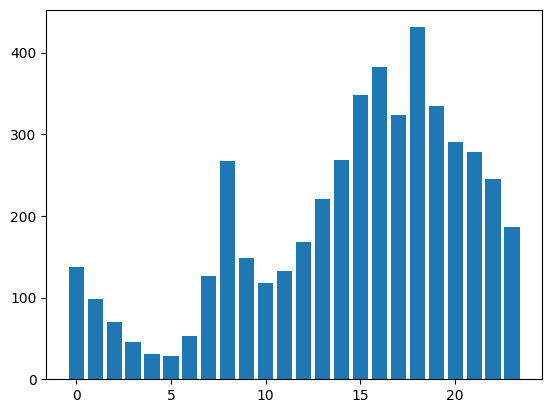

In [61]:
# 시간에 따른 대여수
hour = np.array(train_df['hour'])
count = np.array(train_df['count'])
plt.bar(hour, count)
plt.show()

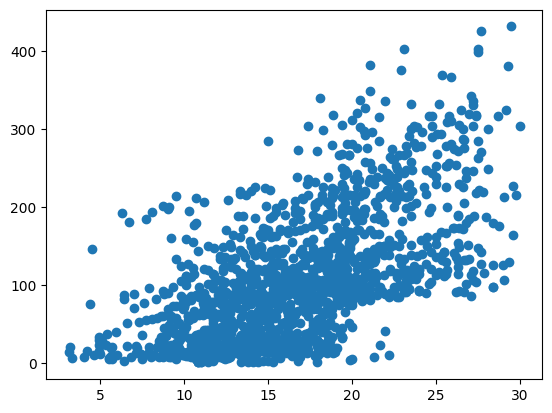

In [64]:
# 기온에 따른 대여수
temp = np.array(train_df['hour_bef_temperature'])
count = np.array(train_df['count'])
plt.scatter(temp, count)
plt.show()

In [53]:
train_df['hour'].unique()

array([20, 13,  6, 23, 18,  2,  3, 21,  9, 14,  4, 10,  1, 17,  8, 16,  0,
        7, 15, 19, 22, 11,  5, 12])

In [49]:
time = train_df.groupby('hour')
time.mean()

,id,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,,,,,,,,,,
0,1200.02,14.79,0.02,1.97,58.17,1434.22,0.03,55.88,30.98,71.77
1,1074.92,14.16,0.05,1.84,60.46,1400.85,NaN,NaN,NaN,47.61
2,1077.89,13.75,0.05,1.63,61.72,1374.28,0.03,58.48,31.37,31.41
3,1146.70,13.36,0.03,1.62,63.13,1326.31,0.03,59.18,31.47,21.38
4,1194.79,13.00,0.02,1.41,64.57,1264.61,0.03,58.28,32.12,13.52
5,1091.82,12.67,0.02,1.30,66.00,1203.43,0.03,56.72,31.53,13.11
6,1112.39,12.38,0.02,1.33,67.41,1146.23,0.03,56.15,31.60,24.56
7,1086.26,12.19,0.02,1.26,67.93,1150.31,0.03,56.53,31.78,62.36
8,1086.49,12.60,0.03,1.63,64.05,1152.87,0.02,57.92,31.80,136.69


In [65]:
# 시간대별로 평균 몇 개가 대여가 되었을까?
train_df.groupby('hour')['count'].mean()

hour
0     71.77
1     47.61
2     31.41
3     21.38
4     13.52
5     13.11
6     24.56
7     62.36
8    136.69
9     93.54
10    78.80
11    88.33
12   111.90
13   120.05
14   134.59
15   152.97
16   169.10
17   187.13
18   262.16
19   201.61
20   164.87
21   168.82
22   148.25
23   103.85
Name: count, dtype: float64

Text(16, 150, 'leave work')

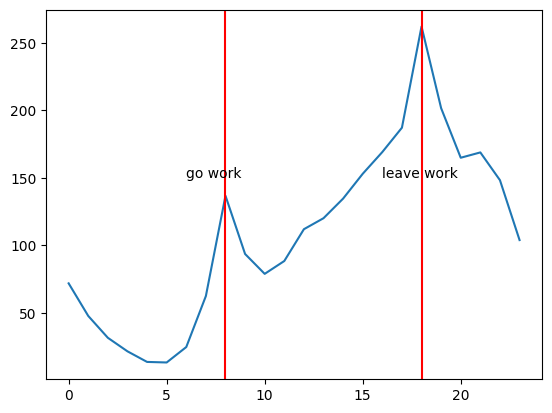

In [67]:
plt.plot(train_df.groupby(['hour'])['count'].mean())
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(6, 150, 'go work')
plt.text(16, 150, 'leave work')